# Chapter 3, Classification
We will work with MNIST dataset for classifying handwritten digits with the corresponding actual value. Scikit provides handy functions to get this dataset.

#### Warning!
The book uses a different method to download MNIST dataset but it seems it is not working, hence I'm using the official sickit's method to download mnist.

In [3]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def factors_of(n):
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return sorted(factors, reverse=True)

def print_samples(X, y, n = 4, raw=False):
    """Print n random samples"""
    if raw:
        rand_indx = np.random.randint(0, len(X), n)
        samples = zip(X[rand_indx], y[rand_indx])
        print(list(samples))
    else:
        # factor n and get the two grates values
        factors = factors_of(n)
        subplot_shape = None
        if len(factors) <= 2:
            subplot_shape = (factors[0], factors[0])
        else:
            # omit the first
            subplot_shape = (factors[1], factors[2] if factors[2] != 1 else factors[1])
        
        n_samples = min(n, subplot_shape[0])
        rand_indx = np.random.randint(0, len(X), n_samples)
        samples = zip(X[rand_indx], y[rand_indx])
        idx = 1
        for features, label in samples:
            # X is a flattened array, to print the image we need
            # to reshape it into a 28 x 28 figure
            plt.subplot(*subplot_shape, idx)
            plt.imshow(features.reshape(28,28), cmap=plt.cm.gray)
            plt.title("Label: {}".format(label))
            idx+=1
        plt.show()

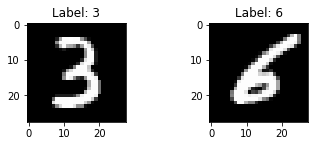

In [82]:
print_samples(X, y, 4)